# **WEEK 4 Supervised Machine learing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
headernames = ['sepal-length' , 'sepal-width','petal-length','petal-width','class']

In [ ]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

In [ ]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Data Preprocessing**

x : All rows are included and first four columns are selected.

y: All rows are included and last columns are selected.



In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:, 4].values

Spliting the train and test data set into 70:30 ratio using train_test_split function.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30)

We create an instance (tool or copy) of StandardScaler function  as scaler.


The fit() method calculates the mean and standard deviation for each feature in X_train and stores these values internally.


Transform() method will help to scale the data values in a perticular same range for all columns.By scaling we makes the SD as 0. That mean we makes the values near to zero as much as possible.




In [ ]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Displaying the mean and SD that found using fit() and it is stored in variables in the instances.

In [ ]:
print("Mean : ",scaler.mean_)
print("Standard Deviation : ",scaler.scale_)

Mean :  [5.82571429 3.06857143 3.72666667 1.17428571]
Standard Deviation :  [0.84244865 0.42388549 1.76372261 0.75756861]


# **Naive Bayes Classification**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train);

In [ ]:
y_pred = classifier.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy : ",accuracy)

Accuracy :  0.9904761904761905


In [ ]:
y_pred = classifier.predict(X_test)

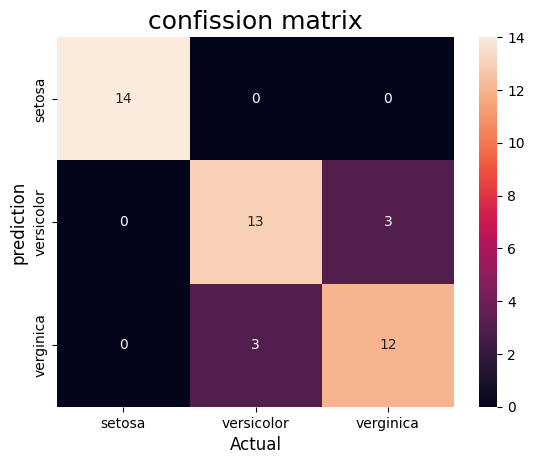

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test,y_pred)
sns.heatmap(result,
            annot = True,
            fmt = 'g',
            xticklabels = ['setosa','versicolor','verginica'],
            yticklabels = ['setosa','versicolor','verginica'])
plt.ylabel('prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('confission matrix',fontsize=18)
plt.show()

In [ ]:
result1 = classification_report(y_test,y_pred)
print("Classification report: ")
print(result1)
result2 = accuracy_score(y_test,y_pred)
print("\n\nAccuracy score : ",result2)

Classification report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.81      0.81      0.81        16
 Iris-virginica       0.80      0.80      0.80        15

       accuracy                           0.87        45
      macro avg       0.87      0.87      0.87        45
   weighted avg       0.87      0.87      0.87        45



Accuracy score :  0.8666666666666667


   ‎

‎


‎

‎

‎

# **SUPPORT VECTOR MACHINE (SVM) CLASSIFIERS**

In [ ]:
from sklearn.svm import SVC
accuracy_list = []

for i in ['linear','poly','rbf','sigmoid']:
  clf = SVC(kernel=i)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_train)
  accuracy = accuracy_score(y_train,y_pred)
  accuracy_list.append(accuracy)

  print("Accuracy of ",i," is",float(accuracy))

Accuracy of  linear  is 0.9904761904761905
Accuracy of  poly  is 0.9523809523809523
Accuracy of  rbf  is 0.9904761904761905
Accuracy of  sigmoid  is 0.9523809523809523


In [ ]:
accuracies={'linear':accuracy_list[0],
            'poly':accuracy_list[1],
            'rbf':accuracy_list[2],
            'sigmoid':accuracy_list[3]}

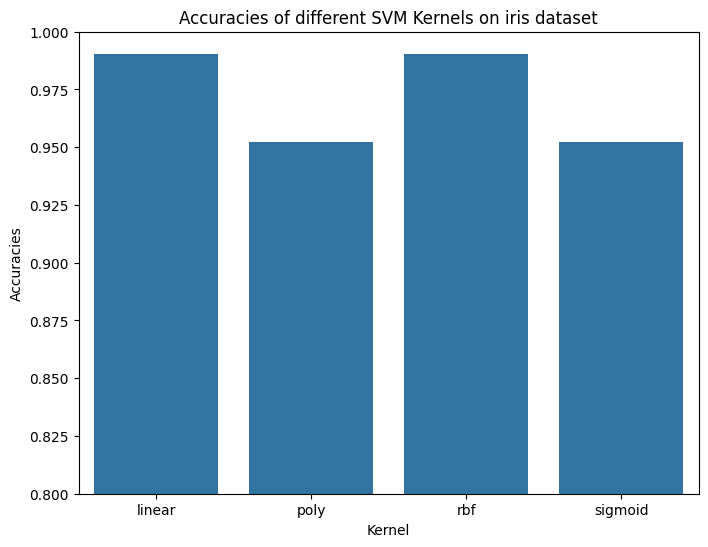

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()))
plt.xlabel("Kernel")
plt.ylabel("Accuracies")
plt.title("Accuracies of different SVM Kernels on iris dataset")
plt.ylim(0.8,1.0) #for better visualization
plt.show()

In [ ]:
accuracy_list = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  clf = SVC(kernel=i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)

  print("accuracy of "+ i, "is", float(accuracy))

accuracy of linear is 0.9111111111111111
accuracy of poly is 0.9111111111111111
accuracy of rbf is 0.9111111111111111
accuracy of sigmoid is 0.8


In [ ]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    'Sigmoid': accuracy_list[3]
}

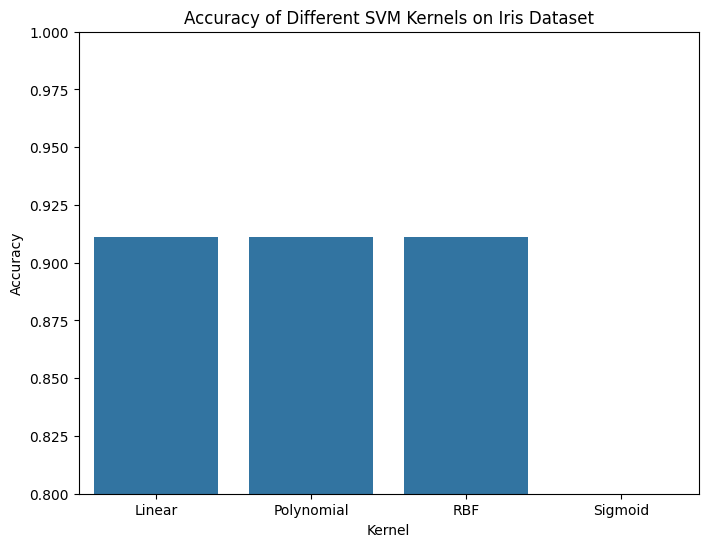

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.show()

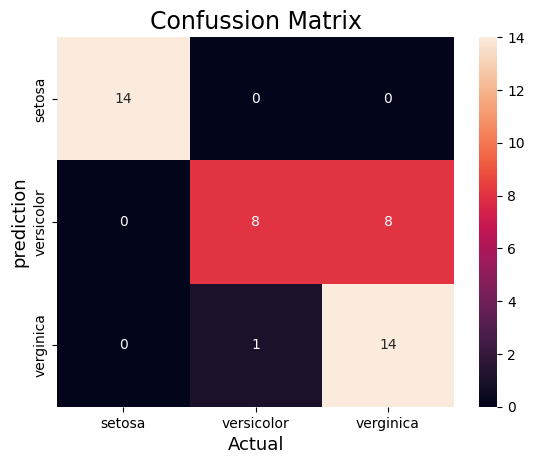

In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix, accuracy_score
result12 = confusion_matrix(y_test,y_pred)
sns.heatmap(result12,
            annot = True,
            fmt = 'g',
            xticklabels = ['setosa','versicolor','verginica'],
            yticklabels = ['setosa','versicolor','verginica'])
plt.ylabel('prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title("Confussion Matrix",fontsize=17)
plt.show()

‎
‎



‎
‎
‎
‎
‎
‎
‎
‎
‎
‎ ‎
‎ ‎
‎ ‎
‎ ‎
‎ ‎
‎ ‎
‎ ‎
‎ ‎
‎ ‎
‎ ‎
‎ ‎
‎

‎
‎

‎
‎

‎
‎

‎
‎

‎
‎

‎
‎

# **K Nearest Neighbour (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 9)
classifier.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("ACCURACY : ",accuracy)

ACCURACY :  0.9904761904761905


In [ ]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("ACCURACY : ",accuracy)

ACCURACY :  0.9111111111111111


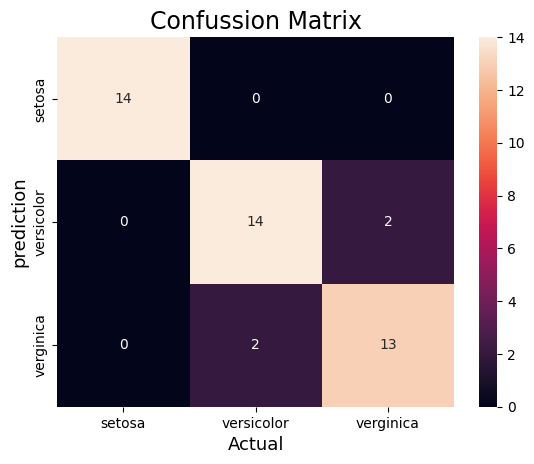

In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix, accuracy_score
result12 = confusion_matrix(y_test,y_pred)
sns.heatmap(result12,
            annot = True,
            fmt = 'g',
            xticklabels = ['setosa','versicolor','verginica'],
            yticklabels = ['setosa','versicolor','verginica'])
plt.ylabel('prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title("Confussion Matrix",fontsize=17)
plt.show()

In [ ]:
result1 = classification_report(y_test,y_pred)
print("Classification report: ")
print(result1)
result2 = accuracy_score(y_test,y_pred)
print("\n\nAccuracy score : ",result2)

Classification report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      0.88      0.88        16
 Iris-virginica       0.87      0.87      0.87        15

       accuracy                           0.91        45
      macro avg       0.91      0.91      0.91        45
   weighted avg       0.91      0.91      0.91        45



Accuracy score :  0.9111111111111111
